# Example 11-2: User-defined functions

```{note}
Click the {fa}`rocket` and open this notebook in Colab to enable interactivity.
```

```{note}
To save your progress, make a copy of this notebook in Colab `File > Save a copy in Drive` and you'll find it in `My Drive > Colab Notebooks`.
```

We will provide another demonstration of Euler's method, but this time, we'll write a custom function for the first derivative.
You will often have to write your own functions when programming and you'll have many opportunities to practice doing so in this course.

## Summary of commands

In this exercise, we will demonstrate the following:
- Writing our own function in Python.

## Euler's method with custom function

Consider the following IVP:

$$ y' = -y + 10 \sin(3t), \quad y(0) = 0, \quad 0 \le t \le 2 $$

The exact solution is $y = -3 \cos (3t) + \sin (3t) + 3e^{-t}$.

We'll numerically solve this ODE using a step size of $h = 0.1$.

### Writing your own function

In Python, the syntax for defining your own function is:

```python
def my_func_name(arg1, arg2, ...):
    """ optional docstring to explain purpose, arguments, etc. """
    do something
    return something   # optional

my_func_name(args)     # calling the function
```

- The `def` at the start is required, as is the colon at the end of the first line.
- Just like variables, function names should be descriptive.
- Arguments are optional, but you should have some input variables.
- Docstrings are optional but very nice to have (for others and future you). No need though if the function is very simple.
- Variables defined in the function body (including arguments) have local scope, i.e., they don't exist outside the function.
- Returning a value is generally optional, but you should have the functional expression here.

Once the ODE function is written, we can call it in the loop.

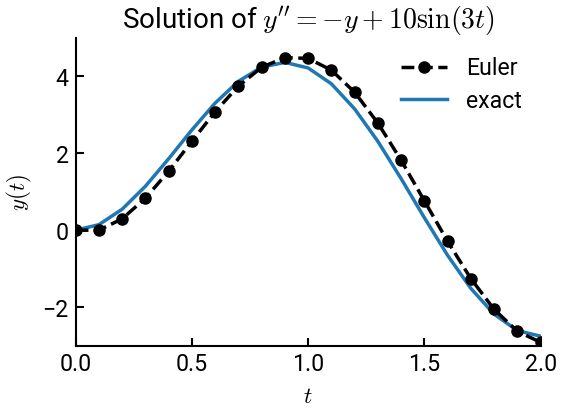

In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# user-defined function
def myODE(t, y):
    return -y + 10 * np.sin(3 * t)

# initialize
h = 0.1
t0 = 0
tf = 2
y0 = 0
y = [y0]
t = np.arange(t0, tf+h, h)

# Euler for loop and exact solution
for n in range(len(t) - 1):
    y.append(y[n] + h * myODE(t[n], y[n]))    # this is where the function goes!

y_exact = -3 * np.cos(3 * t) + np.sin(3 * t) + 3 * np.exp(-t)

# plot and compare with exact
fig, ax = plt.subplots()
ax.plot(t, y, 'k--o', lw=2.5, label='Euler')
ax.plot(t, y_exact, lw=2.5, label='exact', zorder=-5)
ax.set(xlabel='$t$', ylabel='$y(t)$', title=r"Solution of $y'' = -y + 10 \sin(3t)$",
       xlim=[0, tf], ylim=[-3, 5])
ax.legend()
plt.show()